In [1]:
#Reloads the modules to update any changes
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [59]:
import sys
sys.path.append("..")
import scripts.database as database
import plotly_aggs
import ipas
import numpy as np
import glob
import scipy.optimize as opt
import chart_studio
import chart_studio.plotly as py
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

USERNAME = ''  # enter you're username
API_KEY = ''  # enter you're api_key
#chart_studio.tools.set_credentials_file(username=USERNAME, api_key=API_KEY)
chart_studio.tools.set_credentials_file(username='dprzybylo', api_key='Hx5CIas1CXhk1zAmplC4')

In [3]:
glob.glob("/network/rit/lab/sulialab/share/IPAS_3radii/instance_files/createdb_iceagg_rand*")

['/network/rit/lab/sulialab/share/IPAS_3radii/instance_files/createdb_iceagg_rand_r500_1000',
 '/network/rit/lab/sulialab/share/IPAS_3radii/instance_files/createdb_iceagg_rand_r1_5',
 '/network/rit/lab/sulialab/share/IPAS_3radii/instance_files/createdb_iceagg_rand_r6_10',
 '/network/rit/lab/sulialab/share/IPAS_3radii/instance_files/createdb_iceagg_rand_r20_70',
 '/network/rit/lab/sulialab/share/IPAS_3radii/instance_files/createdb_iceagg_rand_r80_400']

## Read Database

In [87]:
orientation = 'rand'  # chose which orientation (rand or flat)
if orientation == 'rand':
    rand_orient = True      #randomly orient the seed crystal and new crystal: uses first random orientation
    files = glob.glob("/network/rit/lab/sulialab/share/IPAS_3radii/instance_files/createdb_iceagg_rand*")[:2]
else:
    rand_orient = False      #randomly orient the seed crystal and new crystal: uses first random orientation
    files =  glob.glob("/network/rit/lab/sulialab/share/IPAS_3radii/instance_files/createdb_iceagg_flat*")[:2]

In [88]:
%%time
db = database.Database(files)
db.read_database()
db.append_shape()
db.truncate_agg_r(5000)
db.append_agg_phi()
df = db.df  # get the dataframe (db is an instance of database.py module)

reading:  /network/rit/lab/sulialab/share/IPAS_3radii/instance_files/createdb_iceagg_rand_r500_1000
reading:  /network/rit/lab/sulialab/share/IPAS_3radii/instance_files/createdb_iceagg_rand_r1_5
CPU times: user 35.1 s, sys: 7.86 s, total: 43 s
Wall time: 1min 25s


In [103]:
df = df.reset_index(drop=True)
df[df.ncrystals == 2].head(3000)

,level_0,index,ncrystals,points,a,b,c,cplx,phi2D,mono_phi,mono_r,shape,agg_r,agg_phi
0,0,0,2,"[[[458.57821349189317, -602.2265765869506, -11...",4390.335660,2638.983911,1372.497469,0.284048,0.422614,0.01000,500,prolate,2022.275296,0.312618
6,29,29,2,"[[[-210.4576996947186, -1294.9113560403885, 13...",3841.501629,2631.939897,1129.017409,0.420354,0.438749,0.01000,500,oblate,2554.078418,0.293900
12,58,58,2,"[[[-1660.647549396947, -1237.233561884294, -28...",4859.674755,3150.825035,1077.540120,0.583363,0.371977,0.01000,500,oblate,2941.367475,0.221731
16,87,87,2,"[[[-2248.524289112185, 1106.3351579466062, -16...",4393.744954,2509.545510,2453.838463,0.411614,0.468041,0.01000,500,prolate,2979.720949,0.558485
21,116,116,2,"[[[-343.9710654619489, 156.0719723756564, 254....",5448.350267,2772.081480,1944.919288,0.395233,0.516980,0.01000,500,prolate,2741.717656,0.356974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51633,86855,86855,2,"[[[176.91629820191122, -3.369961943896783, 63....",1427.111589,790.650841,758.743281,0.370231,0.481840,0.78476,500,prolate,936.589353,0.531664
51662,86884,86884,2,"[[[-438.13555337197846, -19.029877627013377, 4...",1368.091441,734.524484,726.719200,0.351389,0.511931,0.78476,500,prolate,897.324374,0.531192
51691,86913,86913,2,"[[[657.9318254526158, -30.057546557970824, 130...",1534.544934,748.487013,714.740589,0.195464,0.454076,0.78476,500,prolate,922.059260,0.465767
51718,86942,86942,2,"[[[-787.8811934530919, -292.9326096841412, 21....",1485.133013,793.781085,767.760170,0.440705,0.397083,0.78476,500,prolate,956.618633,0.516964


## Generate Plot in Plotly (click on output URL)

In [107]:
index = 51747 # which agg to plot
agg = df.iloc[index]

all_agg_data = []
for crystal_num in range(agg.ncrystals):  # index of monomer in agg
    agg_plt = plotly_aggs.PlotAgg(agg, crystal_num)
    agg_plt.prism_points()
    agg_plt.min_max_all_points()
    agg_plt.basal_points_bottom()
    agg_plt.basal_points_top()
    agg_plt.get_scatter_plot_data()
    # go.Scatter3d for each part of monomer for each monomer in agg
    all_agg_data.extend([agg_plt.trace_prism,
                        agg_plt.trace_basal_top,
                        agg_plt.trace_basal_bottom])

#apply to whole agg, not each individual monomer
xell, yell, zell, x, y, z = agg_plt.ellipsoid_surface()
agg_plt.scatter_ellipsoid(xell, yell, zell, x, y, z)
all_agg_data.append(agg_plt.ellipsoid_surface)
all_agg_data.append(agg_plt.ellipsoid_radius_b1)
all_agg_data.append(agg_plt.ellipsoid_radius_b2)
all_agg_data.append(agg_plt.ellipsoid_radius_r1)
all_agg_data.append(agg_plt.ellipsoid_radius_r2)
all_agg_data.append(agg_plt.ellipsoid_radius_g1)
agg_plt.camera()
agg_plt.layout()

fig = go.Figure(data=all_agg_data, layout=agg_plt.layout)
fig.update_layout(width=700, height=700)
py.iplot(fig)

In [93]:
index = 13  # which agg to plot
agg = df.iloc[index]
agg_clus = ipas.cluster_calculations.ClusterCalculations(agg)

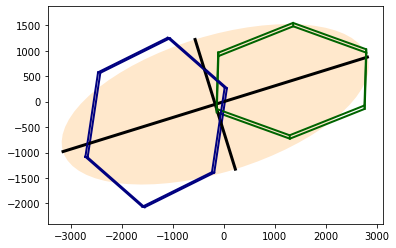

In [16]:
agg_clus.plot_ellipse([['x', 'y']])

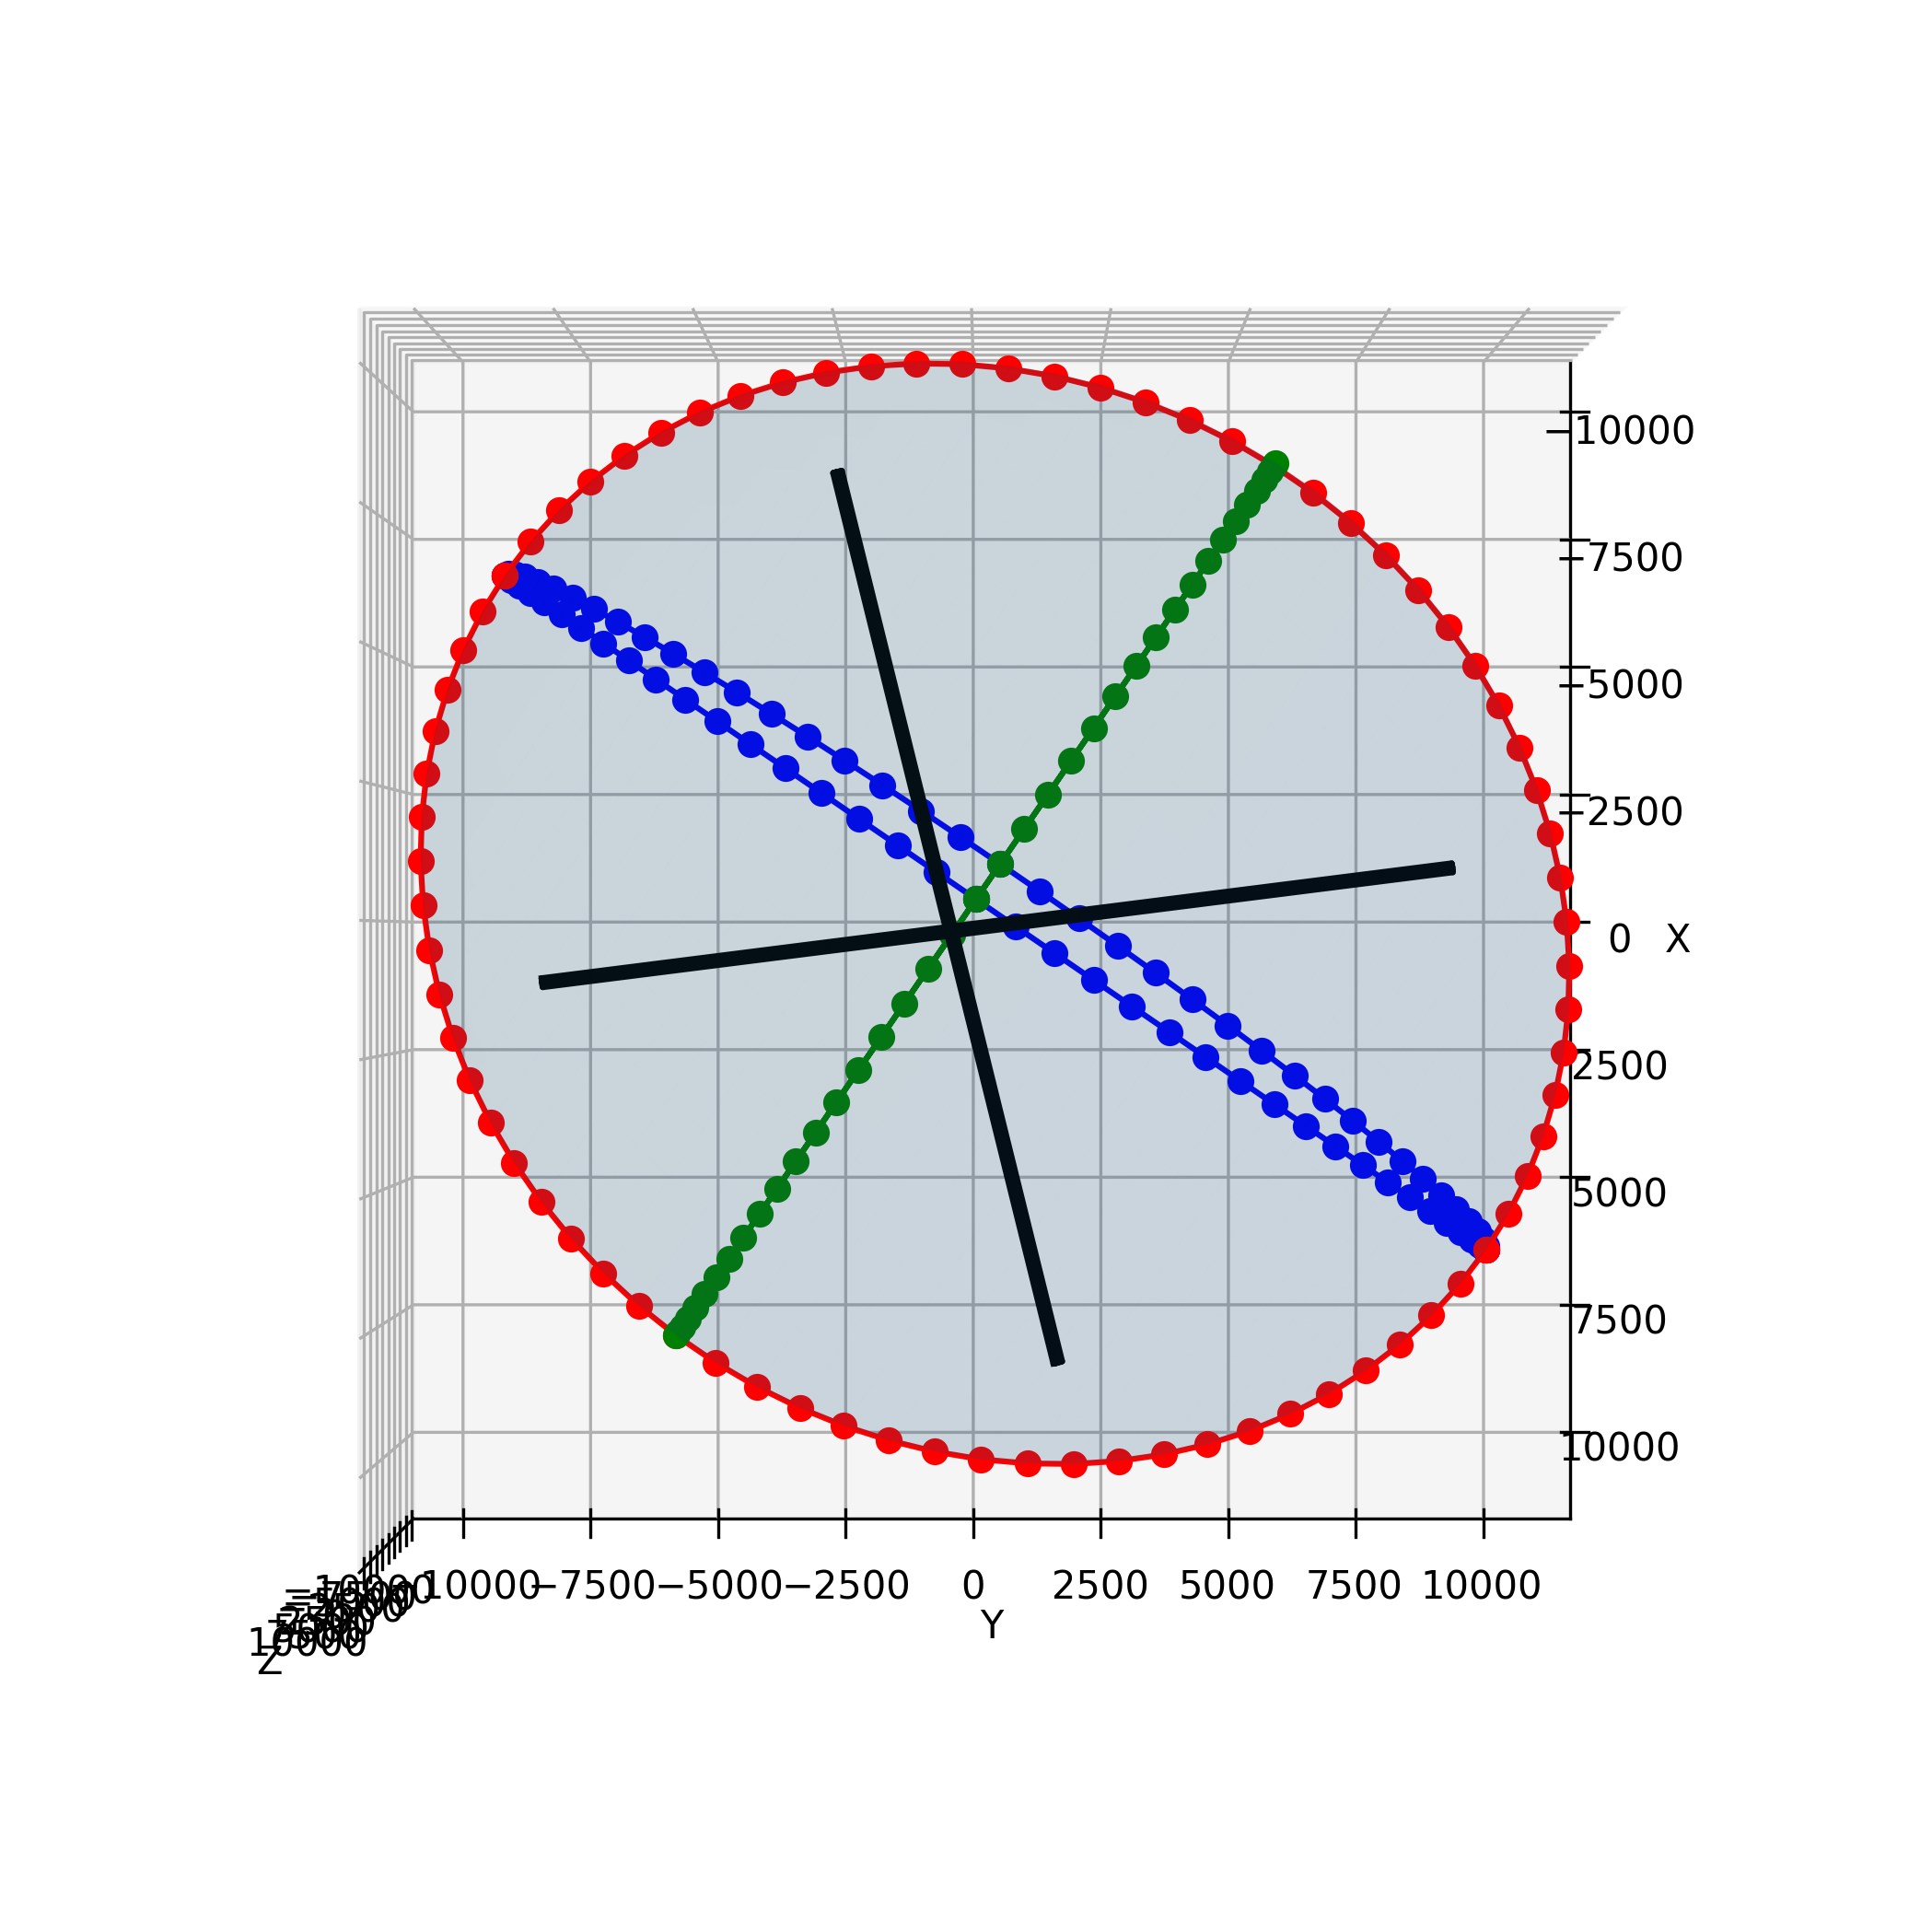

In [18]:
agg_clus.plot_ellipsoid_aggs([agg], view='z', circle=None, agg_agg=True)